<blockquote><h2><i>Face Detection and Classification of Facial Expressions using Convolutional Neural Networks in TensorFlow</i></h2></blockquote>

<h2>HEY THERE!<h2>
<h3>The following code is an implementation of a functionality to detect face in the image captured by your system's webcam and then design a Convolutional
Neural Network in TensorFlow for the classification of facial  expression.</h3>

<font color = green><h4>
Categories for Classification:<br>
    0 : 'Angry'<br>
    1 : 'Disgust'<br>
    2 : 'Fear'<br>
    3 : 'Happy'<br>
    4 : 'Sad'<br>
    5 : 'Surprise'<br>
    6 : 'Neutral'
    </h4></font>

<font color = blue><h3>Required Libraries</h3></font>

In [5]:
import os
import cv2
import PIL.Image
import PIL.ImageTk
import numpy as np
import pandas as pd
from tkinter import *
from PIL import Image
import tensorflow as tf
from ipywidgets import *
import ipywidgets as widgets
from tkinter import messagebox
from tkinter import filedialog 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

categories = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

Using TensorFlow backend.


<font color = green>
    <h3>
        Here dataset - FER2013.csv into split 3 parts : TRAIN, VALIDATION AND TEST DATA.<br>
    </h3>
    <h4>
        Original data dimension : 35887x3<br>
        After splitting, dimension of train data : 28709x3<br>
        dimension of test data : 3589x3<br>
        dimension of validation data : 3589x3<br>
    </h4>
</font>

<b>Link for dataset: <a href="https://drive.google.com/file/d/1n03RCfb5Y-WGvK185vqq2-ZNYlR9dd-b/view?usp=sharing">FER2013 Dataset</a></b>

In [2]:
def load_split_data(path):
    data = pd.read_csv(path)
    dim_data = data.shape
    train_data = (data.loc[data['Usage'] == "Training"]).to_numpy()
    validation_data = (data.loc[data['Usage'] == "PublicTest"]).to_numpy()
    test_data = (data.loc[data['Usage'] == "PrivateTest"]).to_numpy()
    return [train_data, validation_data, test_data]

<font color = blue>
<h3>
    Pre-Processing Data
</h3>
</font>

In [21]:
def pre_processing(train_data, validate_data, test_data):
    rows_zero = len((np.where(train_data[:, 0] == 0))[0])
    rows_one = len((np.where(train_data[:, 0] == 1))[0])
    rows_two = len((np.where(train_data[:, 0] == 2))[0])
    rows_three = len((np.where(train_data[:, 0] == 3))[0])
    rows_four = len((np.where(train_data[:, 0] == 4))[0])
    rows_five = len((np.where(train_data[:, 0] == 5))[0])
    rows_six = len((np.where(train_data[:, 0] == 6))[0])
    zero = np.full(rows_zero, 0)
    one = np.full(rows_one, 1)
    two = np.full(rows_two, 2)
    three = np.full(rows_three, 3)
    four = np.full(rows_four, 4)
    five = np.full(rows_five, 5)
    six = np.full(rows_six, 6)
    args = (zero, one, two, three, four, five, six)
    join = np.concatenate(args)
    
    #Plotting histogram
    plt.figure(figsize=[10,10])
    plt.hist(join, bins=(0, 1, 2, 3, 4, 5, 6, 7), color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.xlabel('Expressions')
    plt.ylabel('Number of Training Samples')
    plt.title(r'Histogram of Training Data Distribution')
    plt.text(0.2, 4200, r'$Angry$')
    plt.text(1.1, 700, r'$Disgust$')
    plt.text(2.2, 4300, r'$Fear$')
    plt.text(3.2, 7300, r'$Happy$')
    plt.text(4.2, 4900, r'$Sad$')
    plt.text(5.1, 3300, r'$Surprise$')
    plt.text(6.2, 5100, r'$Neutral$')
    
    plt.show()
    
    #Under-sampling and Over-sampling
    indices = np.random.choice(np.where(train_data[:, 0] == 1)[0], size=4000, replace=True)
    f = train_data[indices]
    train_data = np.vstack((train_data, f))
    indices = np.random.choice(np.where(train_data[:, 0] == 3)[0], size=4000, replace=True)
    train_data = np.delete(train_data, indices, axis=0)
    train_x = []
    
    #Changing Pixel data to array
    for i in range(0, train_data.shape[0]):
        list_image = train_data[i, 1].split(" ")
        list_image = list(map(int, list_image))
        pix_array = np.array(list_image).reshape(48, 48)
        train_x.append(pix_array)
    train_x = np.asarray(train_x)
    train_y = train_data[:, 0].astype(str)
    validate_x = []
    for i in range(0, validate_data.shape[0]):
        list_image = validate_data[i, 1].split(" ")
        list_image = list(map(int, list_image))
        pix_array = np.array(list_image).reshape(48, 48)
        validate_x.append(pix_array)
    validate_x = np.asarray(validate_x)
    validate_y = validate_data[:, 0].astype(str)
    test_x = []
    for i in range(0, test_data.shape[0]):
        list_image = test_data[i, 1].split(" ")
        list_image = list(map(int, list_image))
        pix_array = np.array(list_image).reshape(48, 48)
        test_x.append(pix_array)
    test_x = np.asarray(test_x)
    test_y = test_data[:, 0].astype(str)
    return [train_x, train_y, validate_x, validate_y, test_x, test_y]

<h3><font color = red>PRE-PROCESSING STEPS :<br></font></h3>
<blockquote>
<h3>
    <font color = green>
        1. Checked for missing data.<br>
        2. Couting number of rows for each expression.<br>
        3. Checked the data distribution by plotting a histogram.<br>
        4. Performed random 'Under-sampling' for Happy images.<br>
        5. Performed random 'Over-sampling' for Disgust images.<br>
        6. Changed Pixel Data to 2D arrays.<br>
    </font>
</h3>
</blockquote>

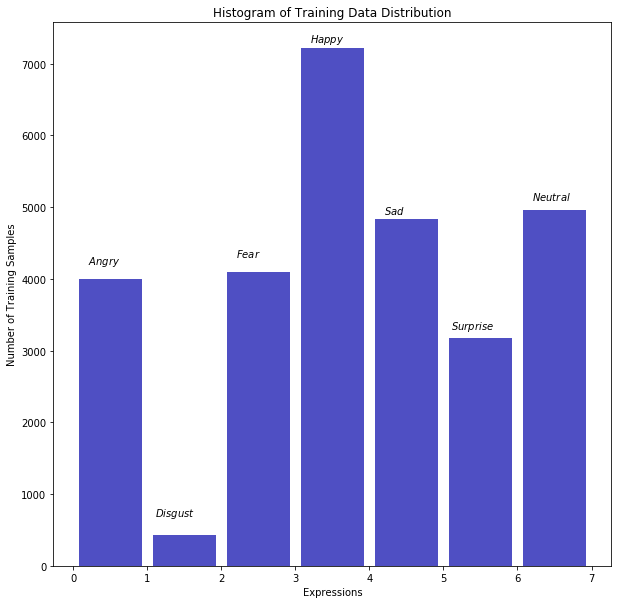

In [22]:
[train, validate, test] = load_split_data("fer2013.csv")
[train_x, train_y, validate_x, validate_y, test_x, test_y] = pre_processing(train, validate, test)
train_x = (train_x.reshape(-1, 48, 48, 1).astype('float32')) / 255
train_y = np_utils.to_categorical(train_y)
validate_x = (validate_x.reshape(-1, 48, 48, 1).astype('float32')) / 255
validate_y = np_utils.to_categorical(validate_y)
test_x = (test_x.reshape(-1, 48, 48, 1).astype('float32')) / 255
test_y = np_utils.to_categorical(test_y)

<h3>Designing and Training the CNN model - Obtained 92.28% training accuracy and 54.17% Validation Accuracy</h3>

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 42, 42, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 9, 9, 64)         

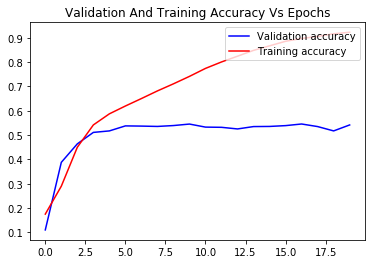

<Figure size 432x288 with 0 Axes>

In [42]:
def train_model(train_x, train_y, validate_x, validate_y):
    classes = 7
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), data_format="channels_last"))
    cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2), padding='same', strides=2))
    cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), data_format="channels_last"))
    cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2), padding='same', strides=2))
    cnn_model.add(MaxPooling2D((2, 2), padding='same', strides=2))
    cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(classes, activation='softmax'))
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    cnn_model.summary()
    fit_model = cnn_model.fit(train_x, train_y, epochs=20, shuffle=True, batch_size=100, validation_data=(validate_x, validate_y), verbose=2)
    cnn_model.save("cnn_modeltry.h5py")
    acc_val = fit_model.history['val_accuracy']
    acc_train = fit_model.history['accuracy']
    epochs = range(len(acc_val))
    plt.plot(epochs, acc_val, "-b", label='Validation accuracy')
    plt.plot(epochs, acc_train, "-r", label='Training accuracy')
    plt.title('Validation And Training Accuracy Vs Epochs')
    plt.legend(loc="upper right")
    plt.figure()
    plt.show()
    return fit_model
#Uncomment the below line of code to train the model
#fit_model=train_model(train_x, train_y, validate_x, validate_y)

<h3>Calculating test accuracy<br>
Here the test accuracy-53.97%</h3>

In [24]:
def show_accuracy(test_x, test_y):
    new_model = tf.keras.models.load_model('cnn_modeltry.h5py')
    test_evaluated = new_model.evaluate(test_x, test_y)
    print('Test accuracy:', test_evaluated[1])
    #new_model.summary()

show_accuracy(test_x, test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.5397047


In [28]:
def load_model():
    new_model = tf.keras.models.load_model('cnn_modeltry.h5py')
    return new_model

<font color = blue>
<h3>
Here, an image is captured using webcam and using Cascade Classifier face is detected. The image is converted into grayscale and finally, the expression on the face is classified using the trained model</h3>
</font>

In [29]:
def detect_faces(b):
    
    new_model = load_model()
    #Using in built classifier 
    f_classifer = cv2.CascadeClassifier('ren.xml')
    camera = cv2.VideoCapture(0)
    cv2.namedWindow("snap")
    while True:
        ret, frame = camera.read()
        cv2.imshow("snap", frame)
        if not ret:
            break
        win = cv2.waitKey(1)
        if win % 256 == 32:
            cv2.imwrite("snapshot.png", frame)
            print("Image captured!")
        elif win % 256 == 27:
            print("Closing the webcam!")
            break
    camera.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    img_col = cv2.imread('snapshot.png')
    img_gray = cv2.cvtColor(img_col, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("gray.jpg", img_gray)
    face_front = f_classifer.detectMultiScale(img_gray, 1.1, 5)
    l = len(face_front)
    if l == 0:
        print("No face detected!")
    else:
        for (a, b, c, d) in face_front:
            cv2.rectangle(img_col, (a, b), (a + c, b + d), (255, 0, 0), 2)
        print("Detected {0} face(s)!".format(l))
        path_file_name = "detected.jpg"
        cv2.imwrite(path_file_name, img_col)
        pil_im = PIL.Image.open('gray.jpg')
        out = pil_im.resize((48, 48))
        img = np.asarray(out)
        path_file_name = "test_out.jpg" 
        cv2.imwrite(path_file_name, img)
        img = (img.reshape(-1, 48, 48, 1).astype('float32')) / 255
        pred = new_model.predict(img)
        pred_class = np.round(pred)
        pred_class=np.argmax(pred_class)
        for k, v in categories.items():
            if pred_class == k:
                print("And the expression is number {0} which is {1}".format(k, v))
        print("The detected image is: ")
        img = cv2.imread('detected.jpg')
        plt.imshow(img)

In [30]:
buttons = Layout(align_items = 'stretch', border = 'solid', width = '50%', height='80px')
out = widgets.Output()

click_image = Button(description = 'PRESS TO START THE WEBCAM', layout = buttons, button_style = 'success')
click_image.on_click(detect_faces)

Button(button_style='success', description='PRESS TO START THE WEBCAM', layout=Layout(align_items='stretch', b…

Output()

Image captured!
Closing the webcam!
Detected 1 face(s)!
And the expression is number 0 which is Angry
The detected image is: 


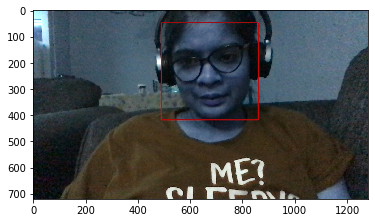

In [31]:
display(click_image, out)

<font color = Red>
<h3>
Press Spacebar to click an image through webcam and then press escape to close the webcam. 
</h3>
<h4>
Note: The webcam feature might not work properly in some versions of MacOS due to different privacy settings. 
</h4>
</font>